Sentiment Analysis on twitter data 

In [1]:
#!pip install TextBlob
#!pip install import nltk

In [2]:
import tweepy as t
import pandas as pd
import re
import nltk
from textblob import TextBlob
import seaborn as sns 
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt 
from nltk.corpus import stopwords

In [3]:
consumer_key='cbaxyUTYgNcsrRBe5D22Jojki'
consumer_secret='aljgjl559mf5Fiof57uE7pXGvxhcYw20jI11yEJ1ptBbocVnie'
access_token='3179398043-EOKyZrbZVAQBcqDjmscs1CwOYBMpKKVXSITdzuw'
access_token_secret='JRot3aW7yIFX7AIqtyQnxmPpP8lg37I8uQxo8SdHIasH4'

In [4]:
auth= t.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)

api=t.API(auth)

tweets=[]
public_tweets = api.user_timeline(id='@nytimes',count=100, lang="en",tweet_mode="extended")
public_tweets
for tweet in public_tweets:
      tweets.append(tweet.full_text)

In [5]:
data=pd.DataFrame(tweets,columns=['tweet'])

In [6]:
data

,tweet
0,News Analysis: There's widespread concern that...
1,A panel of experts advising the CDC is set to ...
2,RT @onishinyt: Our article: a pedophilia scand...
3,Pfizer and BioNTech have submitted their final...
4,Four men arrived at night to dismantle the mys...
...,...
95,Don’t feel bad about cutting down a tree for t...
96,"RT @JulietMacur: Maggie Haney, serving an eigh..."
97,RT @tmagazine: T's Holiday issue celebrates th...
98,The artificial intelligence lab DeepMind built...


In [7]:
#data
data_clean=[]
for t in data['tweet']:
  data_clean.append(re.sub(r"(@[A-Za-z0-9]+)|(#)|(RT[\s])|(http\S+)",'',t))

In [8]:
data['clean']=data_clean

In [9]:
#lower casing
data['clean']=data['clean'].astype(str)
data['clean']=data['clean'].apply(lambda x:" ".join(x.lower() for x in x.split()))

In [10]:
data['clean']=data['clean'].str.replace('^\w\s','')

In [11]:
#removing stopwords
data['clean']=data['clean'].str.replace('^\w\s','')
stop=stopwords.words('english')
data['clean']=data['clean'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [12]:
st = PorterStemmer()
data['clean'] = data['clean'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [13]:
data_polarity=[]
for i in data['clean']:
  data_polarity.append(TextBlob(i).sentiment.polarity)

In [14]:
data['polarity']=data_polarity

In [15]:
data

,tweet,clean,polarity
0,News Analysis: There's widespread concern that...,news analysis: there' widespread concern biden...,-0.166667
1,A panel of experts advising the CDC is set to ...,panel expert advis cdc set decid american reco...,0.083333
2,RT @onishinyt: Our article: a pedophilia scand...,: article: pedophilia scandal reveal rot renau...,0.000000
3,Pfizer and BioNTech have submitted their final...,pfizer biontech submit final applic european h...,0.000000
4,Four men arrived at night to dismantle the mys...,four men arriv night dismantl mysteri monolith...,0.000000
...,...,...,...
95,Don’t feel bad about cutting down a tree for t...,don’t feel bad cut tree holiday. christma tree...,-0.700000
96,"RT @JulietMacur: Maggie Haney, serving an eigh...",": maggi haney, serv eight-year ban mistreat gy...",0.000000
97,RT @tmagazine: T's Holiday issue celebrates th...,: t' holiday issu celebr three america' belov ...,0.000000
98,The artificial intelligence lab DeepMind built...,artifici intellig lab deepmind built comput sy...,-0.181818


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


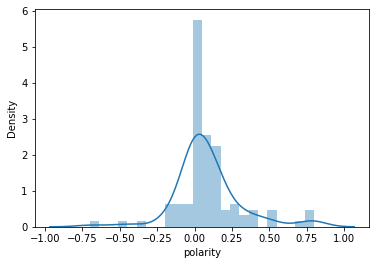

In [16]:
sns.distplot(data['polarity'])

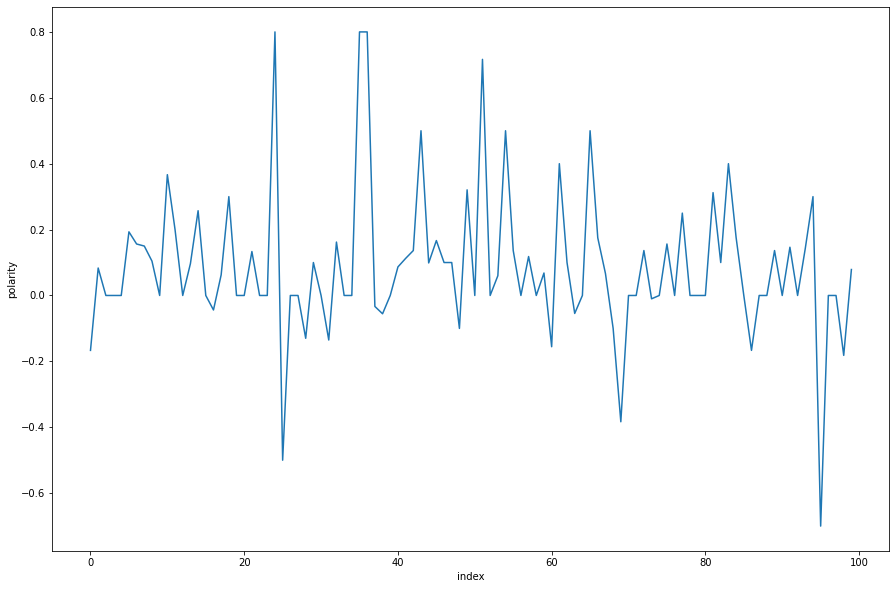

In [17]:
plt.figure(figsize=(15, 10))
data=data.reset_index()
sns.lineplot(y='polarity',x='index',data=data)

In [18]:
A=data['polarity'].copy()
A[data.polarity>0]=1
A[data.polarity<0]=-1
A[data.polarity==0]=0

In [19]:
data['sentiment']=A

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


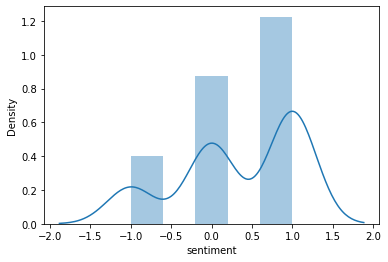

In [20]:
sns.distplot(data['sentiment'])